In [1]:
import pandas as pd
import numpy as np 
import scipy as sc
import plotly 
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import seaborn as sns

from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download NLTK resources
nltk.download('vader_lexicon')

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/inesdimassi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
df=pd.read_csv("/Users/inesdimassi/Documents/Data/theoffice/the_office_linesv.csv")

In [3]:
df

,season,episode,title,scene,speaker,line,Unnamed: 6
0,1,1,Pilot,1,Michael,All right Jim. Your quarterlies look very good...,NaN
1,1,1,Pilot,1,Jim,"Oh, I told you. I couldn't close it. So...",NaN
2,1,1,Pilot,1,Michael,So you've come to the master for guidance? Is ...,NaN
3,1,1,Pilot,1,Jim,"Actually, you called me in here, but yeah.",NaN
4,1,1,Pilot,1,Michael,"All right. Well, let me show you how it's done.",NaN
...,...,...,...,...,...,...,...
54621,9,24,Finale,8153,Creed,It all seems so very arbitrary. I applied for ...,NaN
54622,9,24,Finale,8154,Meredith,I just feel lucky that I got a chance to share...,NaN
54623,9,24,Finale,8155,Phyllis,I'm happy that this was all filmed so I can re...,NaN
54624,9,24,Finale,8156,Jim,I sold paper at this company for 12 years. My ...,NaN


In [4]:
df.size

382382

In [5]:
df.speaker.value_counts()

speaker
Michael             10773
Dwight               6752
Jim                  6222
Pam                  4973
Andy                 3698
                    ...  
Fake Stanley            1
Michael and Erin        1
Deliveryman             1
Zion                    1
Carol Stills            1
Name: count, Length: 775, dtype: int64

In [6]:
df.columns

Index(['season', 'episode', 'title', 'scene', 'speaker', 'line', 'Unnamed: 6'], dtype='object')

In [7]:
df[df['speaker'].str.startswith('Mi')].speaker.value_counts()

speaker
Michael                        10773
Michael:                          74
Michael and Dwight                11
Mikela                             9
Micheal                            9
Michel                             5
Micahel                            4
Michael                            3
Michae                             2
Minister                           2
Michael & Dwight                   2
Michael and Jim                    2
Miss Trudy                         2
Michael and Christian              2
Michael and Samuel together        1
Michael and Andy                   1
Mihael                             1
Miichael                           1
Michael and Erin                   1
Michael, Pam & Ryan                1
Micael                             1
Michal                             1
Michael, Holly, and Darryl         1
Michael and Holly                  1
Michael & Holly                    1
Michael/Dwight                     1
Michael's Ad                  

In [8]:
def case_when(*args):
    return np.select(
        condlist = args[::2],
        choicelist = args[1::2],
        default=pd.NA
    )

In [9]:
df['character'] = case_when(df['speaker'] == 'Michael: ','Michael',
                         df['speaker'] == 'Micheal', "Michael", # Not taken because it's after the first line
                         df["speaker"] == 'Michel', "Michael",
                           df["speaker"] == 'Micahel', "Michael",
                           df["speaker"] == 'Michael ', "Michael",
                           df["speaker"] == 'Michae', "Michael",
                           df["speaker"] == 'Mihael', "Michael",
                           df["speaker"] == 'Miichael', "Michael",
                           df["speaker"] == 'Micael', "Michael",
                           df["speaker"] == 'Michal', "Michael",
                           df["speaker"] == 'MIchael', "Michael",
                            
                            True, df["speaker"]
                         )

In [10]:
df[df['character'].str.startswith('Mi')].character.value_counts()

character
Michael                        10875
Michael and Dwight                11
Mikela                             9
Michael & Dwight                   2
Minister                           2
Miss Trudy                         2
Michael and Jim                    2
Michael and Christian              2
Michael's Ad                       1
Michael/Dwight                     1
Michael and Darryl                 1
Michael and Holly                  1
Michael, Holly, and Darryl         1
Michael, Pam & Ryan                1
Michael and Erin                   1
Michael and Andy                   1
Michael and Samuel together        1
Michael & Holly                    1
Name: count, dtype: int64

In [11]:
df[df['speaker'].str.startswith('J')].speaker.value_counts()

speaker
Jim                             6222
Jan                              805
Jo                               189
Josh                              56
Jessica                           51
Jim:                              33
Jada                              22
Jake                              21
Jerry                             14
Julia                             13
Jordan                            13
Julie:                            12
Jeb                               11
Julius                            11
Justin                             9
Justine                            5
Joan                               5
Jerome Bettis                      4
Jakey                              4
Jim and Pam                        4
Jamie                              3
Jessica Alba                       2
Jim & Dwight                       2
Jim                                2
Jim, Pam, Michael and Dwight       2
JIM9334                            2
Jim, Josh, and Dwight         

In [12]:
df['character'] = case_when(df['speaker'] == 'Jim: ','Jim',
                        df['speaker'] == 'Jim ', 'Jim', # Not taken because it's after the first line,
                        df['speaker'] == 'JIm', 'Jim',
                        df['speaker'] == 'JIM9334', 'Jim',
                        df['speaker'] == '"Jim"', 'Jim',
                            True, df['character']
                         )

In [13]:
df[df['character'].str.startswith('J')].character.value_counts()

character
Jim                             6261
Jan                              805
Jo                               189
Josh                              56
Jessica                           51
Jada                              22
Jake                              21
Jerry                             14
Julia                             13
Jordan                            13
Julie:                            12
Jeb                               11
Julius                            11
Justin                             9
Justine                            5
Joan                               5
Jim and Pam                        4
Jakey                              4
Jerome Bettis                      4
Jamie                              3
Jim & Dwight                       2
Jessica Alba                       2
Jim, Pam, Michael and Dwight       2
Julius Irving                      1
Jim and Dwight                     1
Jim's Dad                          1
Jim & Pam                   

In [14]:
df[df['speaker'].str.startswith('Dw')].speaker.value_counts()

speaker
Dwight                       6752
Dwight:                        34
Dwight and Michael              5
DwightKSchrute                  3
Dwight                          2
Dwight and Erin                 2
Dwight and Andy                 2
Dwight:                         1
Dwight & Andy                   1
Dwight, Jim and Michael         1
Dwight.                         1
Dwight and Angela               1
Dwight & Nate                   1
Dwight, Erin, Jim & Kevin       1
Name: count, dtype: int64

In [15]:
df['character'] = case_when(df['speaker'] == 'Dwight: ','Dwight',
                        df['speaker'] == 'Dwight ', "Dwight", # Not taken because it's after the first line,
                        df['speaker'] == 'Dwight:', "Dwight",
                        df['speaker'] == 'Dwight.', "Dwight",
                        df['speaker'] == 'DwightKSchrute', "Dwight",
                        df['speaker'] == 'Dight', "Dwight",
                            True, df['character']
                         )

In [16]:
df[df['character'].str.startswith('Dw')].character.value_counts()

character
Dwight                       6794
Dwight and Michael              5
Dwight and Erin                 2
Dwight and Andy                 2
Dwight & Andy                   1
Dwight, Jim and Michael         1
Dwight and Angela               1
Dwight & Nate                   1
Dwight, Erin, Jim & Kevin       1
Name: count, dtype: int64

In [17]:
df['character'] = case_when(df['speaker'] == 'Ryan:','Ryan',
                        df['speaker'] == 'Ryan Howard ', "Ryan", # Not taken because it's after the first line,
                        df['speaker'] == 'Ryan: ', "Ryan",
                        df['speaker'] == 'Rolph:', "Rolf",
                        df['speaker'] == 'Andy:', "Andy",
                        df['speaker'] == 'Andy: ', "Andy",
                        df['speaker'] == 'Angela:', "Angela",
                        df['speaker'] == 'Angela: ', "Angela",
                        df['speaker'] == '"Angela"', "Angela",
                        df['speaker'] == 'Angel', "Angela",
                        df['speaker'] == 'Anglea', "Angela",
                        df['speaker'] == 'Angels', "Angela",
                        df['speaker'] == 'Bob Vance', "Bob",
                        df['speaker'] == 'Bill', "Billy",
                        df['speaker'] == 'Creed:', "Creed",
                        df['speaker'] == 'Creed: ', "Creed",
                        df['speaker'] == 'David', "David Wallace",
                        df['speaker'] == 'David Wallcve', "David Wallace",
                        df['speaker'] == 'Erin:', "Erin",
                        df['speaker'] == 'Glen', "Glenn",
                        df['speaker'] == 'Helen', "Helene",
                        df['speaker'] == 'Holy', "Holly",
                        df['speaker'] == "(Pam's mom) Heleen", "Helene",
                        df['speaker'] == 'Isabel:', "Isabel",
                        df['speaker'] == ' Jo', "Jo",
                        df['speaker'] == ' Jim', "Jim",
                        df['speaker'] == 'Jo Bennett', "Jo",
                        df['speaker'] == '"Jo"', "Jo",
                        df['speaker'] == 'Kevin:', "Kevin",
                        df['speaker'] == 'Kevin: ', "Kevin",
                        df['speaker'] == 'Kelly:', "Kelly",
                        df['speaker'] == 'Kelly: ', "Kelly",
                        df['speaker'] == 'Oscar:', "Oscar",
                        df['speaker'] == 'Oscar: ', "Oscar",
                        df['speaker'] == 'Pam:', "Pam",
                        df['speaker'] == 'Pam: ', "Pam",
                        df['speaker'] == 'Pam ', "Pam",
                        df['speaker'] == 'Phyliss', "Phyllis",
                        df['speaker'] == '"Phyllis"', "Phyllis",
                        df['speaker'] == 'Phylis', "Phyllis",
                        df['speaker'] == 'Phyllis:', "Phyllis",
                        df['speaker'] == 'Phyllis: ', "Phyllis",
                        df['speaker'] == 'Stanely', "Stanley",
                        df['speaker'] == 'Stanley:', "Stanley",
                        df['speaker'] == 'Stanley: ', "Stanley",
                        df['speaker'] == 'Todd', "Todd Packer",
                        df['speaker'] == 'Meredith: ', "Meredith",
                        df['speaker'] == 'Meridith: ', "Meredith",
                            
                            

                            
                            True, df['character']
                         )

In [18]:
df[df['character'].str.startswith('Os')].character.value_counts()

character
Oscar                              1356
Oscar's friend                        3
Oscar and Stanley                     1
Oscar's voice from the computer       1
Oscar's Computer                      1
Name: count, dtype: int64

In [19]:
df[df['character'].str.startswith('Ke')].character.value_counts()

character
Kevin               1542
Kelly                826
Kenny                 15
Kendall                8
Keena Gifford          6
Kelly's Mom            5
Kelly's Father         3
Kelly and Erin         2
Kevin & Oscar          1
Kevin & Meredith       1
Name: count, dtype: int64

In [20]:
df[df['character'].str.startswith('Me')].character.value_counts()

character
Meredith       557
Melissa         13
Mema            13
Megan           10
Merv            10
Melvina          5
Meridith         2
Member           2
Mee-Maw          1
MeeMaw           1
Merv Bronte      1
Name: count, dtype: int64

In [21]:
df[df['character'].str.startswith('Cr')].character.value_counts()

character
Creed              395
Craig               11
Crowd                6
Credit card rep      1
Name: count, dtype: int64

In [22]:
df[df['character'].str.startswith('Ph')].character.value_counts()

character
Phyllis                              972
Photographer                          13
Phil                                   9
Phone Salesman                         7
Phone                                  6
Phil Maguire                           4
Phillip                                3
Phyllis, Meredith, Michael, Kevin      1
Phyllis and Creed                      1
Phyllis, Stanley, Dwight               1
Phyllis, Kevin & Stanley               1
Philip                                 1
Name: count, dtype: int64

In [23]:
df[df['character'].str.startswith('St')].character.value_counts()

character
Stanley           674
Stephanie           9
Steve               5
Stripper            5
Students            4
Stonewall Host      3
Store Employee      1
Staples Guy         1
Student 1           1
Student 2           1
Stewardess          1
Stu                 1
Name: count, dtype: int64

In [24]:
df[df['character'].str.startswith('Hol')].character.value_counts()

character
Holly          557
Holly's Dad      5
Holly's Mom      4
Name: count, dtype: int64

In [25]:
df['character'] = case_when(df['speaker'] == 'Bar Manager: ','Bar Manager',
                        df['speaker'] == 'Isabel: ', "Isabel", # Not taken because it's after the first line,
                        df['speaker'] == 'Erin: ', "Erin",
                        df['speaker'] == 'Julie: ', "Julie",
                        df['speaker'] == 'Darryl: ', "Darryl",
                        df['speaker'] == 'Matt: ', " Matt",
                        df['speaker'] == 'Hide: ', "Hide",
                        df['speaker'] == 'Everyone: ', "Everyone",
                        df['speaker'] == 'Warehouse Guy: ', "Warehouse Guy",
                        df['speaker'] == 'Bouncer: ', "Bouncer",
                        df['speaker'] == 'Girl at table: ', "Girl at table",
                        
                   

                            
                            True, df['character']
                         )

In [26]:
df[df['character']=='Michael']

,season,episode,title,scene,speaker,line,Unnamed: 6,character
0,1,1,Pilot,1,Michael,All right Jim. Your quarterlies look very good...,NaN,Michael
2,1,1,Pilot,1,Michael,So you've come to the master for guidance? Is ...,NaN,Michael
4,1,1,Pilot,1,Michael,"All right. Well, let me show you how it's done.",NaN,Michael
5,1,1,Pilot,2,Michael,"Yes, I'd like to speak to your office manager...",NaN,Michael
6,1,1,Pilot,3,Michael,"I've, uh, I've been at Dunder Mifflin for 12 y...",NaN,Michael
...,...,...,...,...,...,...,...,...
39916,7,22,"Goodbye, Michael",5969,Michael,Later guys.,NaN,Michael
39917,7,22,"Goodbye, Michael",5970,Michael,Got almost everybody. So... Holly's my family ...,NaN,Michael
39918,7,22,"Goodbye, Michael",5971,Michael,"Well, I guess this is it. Hey will you guys l...",NaN,Michael
54467,9,24,Finale,8109,Michael,That's what she said.,NaN,Michael


In [27]:
df.columns


Index(['season', 'episode', 'title', 'scene', 'speaker', 'line', 'Unnamed: 6',
       'character'],
      dtype='object')

In [28]:
theofficedf = df[['season', 'episode', 'title', 'scene', 'speaker', 'line',
       'character']]

In [29]:
theofficedf

,season,episode,title,scene,speaker,line,character
0,1,1,Pilot,1,Michael,All right Jim. Your quarterlies look very good...,Michael
1,1,1,Pilot,1,Jim,"Oh, I told you. I couldn't close it. So...",Jim
2,1,1,Pilot,1,Michael,So you've come to the master for guidance? Is ...,Michael
3,1,1,Pilot,1,Jim,"Actually, you called me in here, but yeah.",Jim
4,1,1,Pilot,1,Michael,"All right. Well, let me show you how it's done.",Michael
...,...,...,...,...,...,...,...
54621,9,24,Finale,8153,Creed,It all seems so very arbitrary. I applied for ...,Creed
54622,9,24,Finale,8154,Meredith,I just feel lucky that I got a chance to share...,Meredith
54623,9,24,Finale,8155,Phyllis,I'm happy that this was all filmed so I can re...,Phyllis
54624,9,24,Finale,8156,Jim,I sold paper at this company for 12 years. My ...,Jim


In [30]:
thatwhat=theofficedf[ (df['title']!='Moving On') & (df['title']!='A.A.R.M')  &  (df['scene']!=3847) & (df['scene']!=217) &
(theofficedf['line'].str.contains( "That's what she|That's what he|THAT'S WHAT|that's what she|That's what he sa|That's what HE sa|That's what Osc|That's-I|Yes. Come on! Get it up! That's what... let's") )

]

In [31]:
thatwhat.shape 

(41, 7)

In [32]:
theofficedf[(theofficedf['season']==5) & (df['title'].str.contains('Stress')) & (theofficedf['character']=='Michael') & (theofficedf['line'].str.contains('Oscar'))]

,season,episode,title,scene,speaker,line,character
22287,5,14,Stress Relief (Parts 1&2),3573,Michael,Ok... I think that thing is on the fritz. Ahh....,Michael
22403,5,14,Stress Relief (Parts 1&2),3606,Michael,Well I wrote them down so I wouldn't forget. J...,Michael
22405,5,14,Stress Relief (Parts 1&2),3606,Michael,"Andy, Cornell called, they think you suck. And...",Michael


In [33]:
theofficedf[(theofficedf['season']==7) & (df['episode']==3) & (theofficedf['character']=='Michael') & ( theofficedf['line'].str.contains("Andy") ) ]

,season,episode,title,scene,speaker,line,character
34135,7,3,Andy's Play,5194,Michael,Really? They didn't call me. Who am I playing?...,Michael
34144,7,3,Andy's Play,5197,Michael,"Andy, what time's the show?",Michael
34149,7,3,Andy's Play,5198,Michael,"They say that no one can take your pride, but ...",Michael
34155,7,3,Andy's Play,5200,Michael,"I can't Andy, it's too hard. That's-I put ever...",Michael
34159,7,3,Andy's Play,5200,Michael,"I wish I could, Andy, but I can't. I have plan...",Michael
34338,7,3,Andy's Play,5232,Michael,"Oscar. Enough with the sass, please. God! What...",Michael
34346,7,3,Andy's Play,5232,Michael,"Come on, Andy, seriously.",Michael


In [34]:
theofficedf[(theofficedf['season']==5) & (df['episode']==14) & (df['scene']==3573)].line.values

array([' It is a beautiful, sunny day as we walk through the meadow that is very spiritual and relaxing and there are flowers and it is sunny and beautiful. Now, up ahead, a castle, in a distance.',
       "Don't open your eyes.", 'What?  Oh...',
       'And you walk up toward the castle, and inside the castle are 4 men, and each of them, none of them have shoes, and they give you a funny cigarette, and you feel even more relaxed, and then you want ice cream. You want a big bowl of ice cream. What kind do you want? Shout it out.',
       'Chunky monkey.', 'Too expensive.', 'Chocolate.',
       'Racism is dead Stanley, you can have any kind of ice cream you want. What do you want?  What is that? People! Please I told you to get rid of the cell phones.',
       "It's my bio-feedback machine..",
       'Oh, ok. What is that, like, a video game?',
       'It alerts me when my stress level goes up so I can try to calm down.',
       'You have stress?', 'Yes...', 'During our relaxation exerc

In [35]:
thatwhat.to_csv('thatwhatshesaid.csv')

In [36]:
thatwhat

,season,episode,title,scene,speaker,line,character
1885,2,2,Sexual Harassment,306,Michael,That's what she said. Pam?,Michael
1887,2,2,Sexual Harassment,306,Michael,"That's what she sai Nope, but... Okay. Well, ...",Michael
1934,2,2,Sexual Harassment,316,Michael,THAT'S WHAT SHE SAID!,Michael
3965,2,10,Christmas Party,621,Michael,"A, that's what she said, and B, I wanted it to...",Michael
4777,2,12,The Injury,752,Dwight,That's what she said.,Dwight
5825,2,17,Dwight's Speech,953,Michael,That's what she said!,Michael
6799,2,21,Conflict Resolution,1128,Michael,"That's what she said. The thing is, Angela......",Michael
7450,3,1,Gay Witch Hunt,1264,Michael,I am glad that today spurred social change. Th...,Michael
9996,3,10,A Benihana Christmas (Parts 1&2),1683,Michael,Oh. That's what she said.,Michael
10563,3,13,Traveling Salesmen,1781,Dwight,That's what she said.,Dwight


In [37]:
theofficedf

,season,episode,title,scene,speaker,line,character
0,1,1,Pilot,1,Michael,All right Jim. Your quarterlies look very good...,Michael
1,1,1,Pilot,1,Jim,"Oh, I told you. I couldn't close it. So...",Jim
2,1,1,Pilot,1,Michael,So you've come to the master for guidance? Is ...,Michael
3,1,1,Pilot,1,Jim,"Actually, you called me in here, but yeah.",Jim
4,1,1,Pilot,1,Michael,"All right. Well, let me show you how it's done.",Michael
...,...,...,...,...,...,...,...
54621,9,24,Finale,8153,Creed,It all seems so very arbitrary. I applied for ...,Creed
54622,9,24,Finale,8154,Meredith,I just feel lucky that I got a chance to share...,Meredith
54623,9,24,Finale,8155,Phyllis,I'm happy that this was all filmed so I can re...,Phyllis
54624,9,24,Finale,8156,Jim,I sold paper at this company for 12 years. My ...,Jim


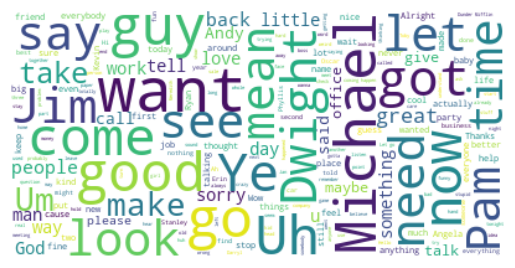

In [38]:
# Combine all rows of the column into a single string
text = ' '.join(theofficedf['line'])

# Create stopword list
stopwords = set(STOPWORDS)
# Add custom stopwords if needed
stopwords.update(["Ok", "Okay", "Oh", "Yeah", "Well", "really", "know", "Hey", "going", "right", "think", "gonna", "one", "thing", "will", "thank"])  
# Generate a word cloud image

wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, background_color="white").generate(text)
#wordcloud.to_file("theofficewc.png")
# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

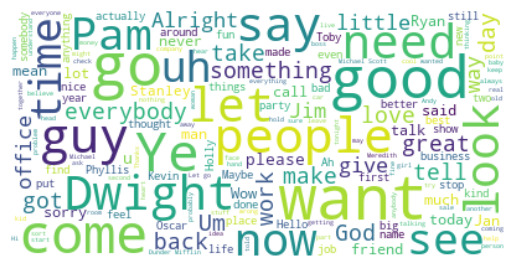

In [39]:
#' '.join(theofficedf['line'])
#mikedf=theofficedf[theofficedf['character']=='Michael']
# Combine all rows of the column into a single string
text = ' '.join(theofficedf[theofficedf['character']=='Michael']['line'])

# Create stopword list
stopwords = set(STOPWORDS)
stopwords.update(["Ok", "Okay", "Oh", "Yeah", "Well", "really", "know", "Hey", "going", "right", "think", "gonna", "one", "thing", "will", "thank"])  
# Generate a word cloud image

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, background_color="white").generate(text)
#wordcloud.to_file("michaelwc.png")
# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

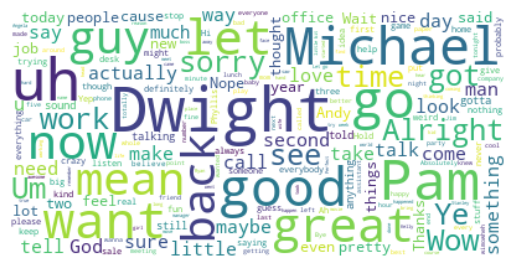

In [40]:
#' '.join(theofficedf['line'])
#mikedf=theofficedf[theofficedf['character']=='Michael']
# Combine all rows of the column into a single string
text = ' '.join(theofficedf[theofficedf['character']=='Jim']['line'])

# Create stopword list
stopwords = set(STOPWORDS)
stopwords.update(["Ok", "Okay", "Oh", "Yeah", "Well", "really", "know", "Hey", "going", "right", "think", "gonna", "one", "thing", "will", "thank"])  
# Generate a word cloud image

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, background_color="white").generate(text)
#wordcloud.to_file("jimwc.png")
# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

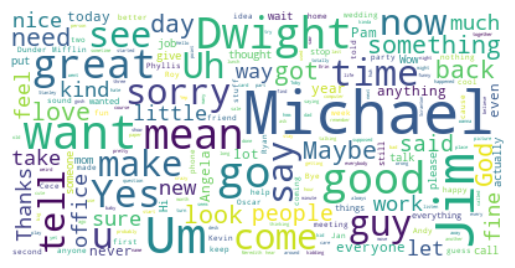

In [41]:
#' '.join(theofficedf['line'])
#mikedf=theofficedf[theofficedf['character']=='Michael']
# Combine all rows of the column into a single string
text = ' '.join(theofficedf[theofficedf['character']=='Pam']['line'])

# Create stopword list
stopwords = set(STOPWORDS)
stopwords.update(["Ok", "Okay", "Oh", "Yeah", "Well", "really", "know", "Hey", "going", "right", "think", "gonna", "one", "thing", "will", "thank"])  
# Generate a word cloud image

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, background_color="white").generate(text)
#wordcloud.to_file("pamwc.png")
# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

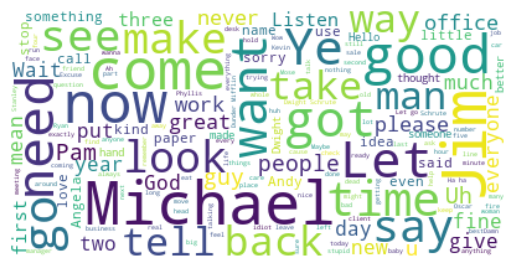

In [42]:
#' '.join(theofficedf['line'])
#mikedf=theofficedf[theofficedf['character']=='Michael']
# Combine all rows of the column into a single string
text = ' '.join(theofficedf[theofficedf['character']=='Dwight']['line'])

# Create stopword list
stopwords = set(STOPWORDS)
stopwords.update(["Ok", "Okay", "Oh", "Yeah", "Well", "really", "know", "Hey", "going", "right", "think", "gonna", "one", "thing", "will", "thank"])  
# Generate a word cloud image

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, background_color="white").generate(text)
#wordcloud.to_file("dwightwc.png")
# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

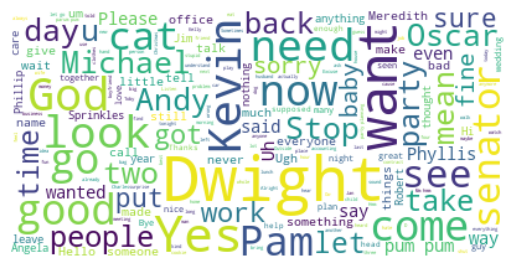

In [43]:
#' '.join(theofficedf['line'])
#mikedf=theofficedf[theofficedf['character']=='Michael']
# Combine all rows of the column into a single string
text = ' '.join(theofficedf[theofficedf['character']=='Angela']['line'])

# Create stopword list
stopwords = set(STOPWORDS)
stopwords.update(["Ok", "Okay", "Oh", "Yeah", "Well", "really", "know", "Hey", "going", "right", "think", "gonna", "one", "thing", "will", "thank"])  
# Generate a word cloud image

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, background_color="white").generate(text)
#wordcloud.to_file("angela.png")
# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

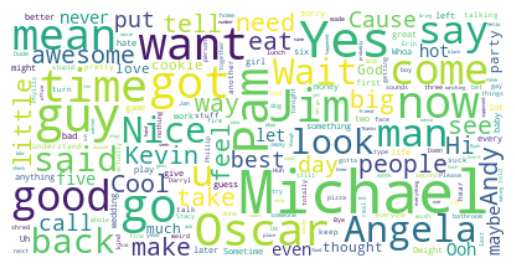

In [44]:
#' '.join(theofficedf['line'])
#mikedf=theofficedf[theofficedf['character']=='Michael']
# Combine all rows of the column into a single string
text = ' '.join(theofficedf[theofficedf['character']=='Kevin']['line'])

# Create stopword list
stopwords = set(STOPWORDS)
stopwords.update(["Ok", "Okay", "Oh", "Yeah", "Well", "really", "know", "Hey", "going", "right", "think", "gonna", "one", "thing", "will", "thank"])  
# Generate a word cloud image

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, background_color="white").generate(text)
#wordcloud.to_file("kevinwc.png")
# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

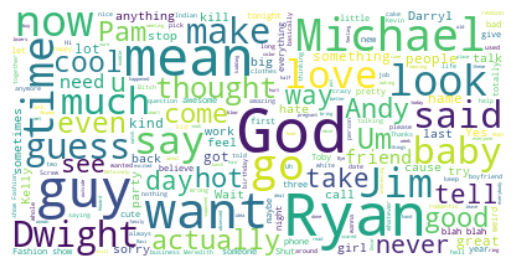

In [45]:
# Combine all rows of the column into a single string
text = ' '.join(theofficedf[theofficedf['character']=='Kelly']['line'])

# Create stopword list
stopwords = set(STOPWORDS)
stopwords.update(["Ok", "Okay", "Oh", "Yeah", "Well", "really", "know", "Hey", "going", "right", "think", "gonna", "one", "thing", "will", "thank"])  
# Generate a word cloud image

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, background_color="white").generate(text)
#wordcloud.to_file("kellywc.png")
# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

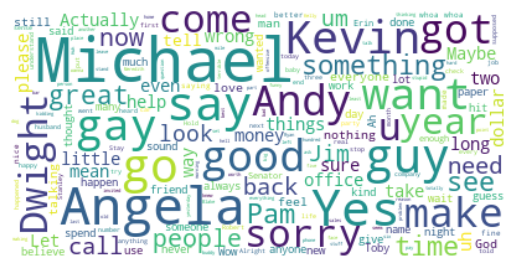

In [46]:
#' '.join(theofficedf['line'])
#mikedf=theofficedf[theofficedf['character']=='Michael']
# Combine all rows of the column into a single string
text = ' '.join(theofficedf[theofficedf['character']=='Oscar']['line'])

# Create stopword list
stopwords = set(STOPWORDS)
stopwords.update(["Ok", "Okay", "Oh", "Yeah", "Well", "really", "know", "Hey", "going", "right", "think", "gonna", "one", "thing", "will", "thank"])  
# Generate a word cloud image

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, background_color="white").generate(text)
#wordcloud.to_file("oscarwc.png")
# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

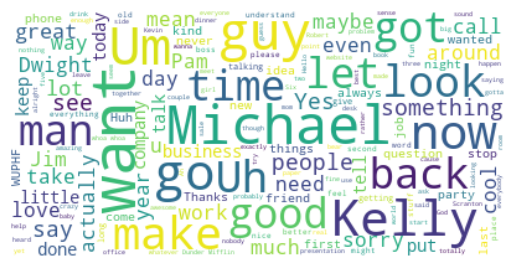

In [47]:
# Combine all rows of the column into a single string
text = ' '.join(theofficedf[theofficedf['character']=='Ryan']['line'])

# Create stopword list
stopwords = set(STOPWORDS)
stopwords.update(["Ok", "Okay", "Oh", "Yeah", "Well", "really", "know", "Hey", "going", "right", "think", "gonna", "one", "thing", "will", "thank"])  
# Generate a word cloud image

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, background_color="white").generate(text)
#wordcloud.to_file("ryanwc.png")
# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

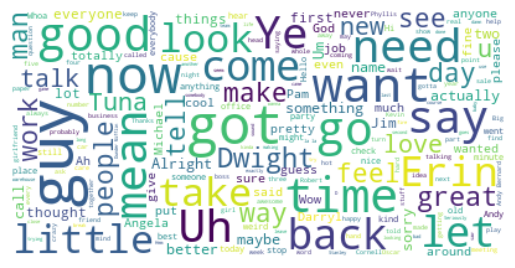

In [48]:
# Combine all rows of the column into a single string
text = ' '.join(theofficedf[theofficedf['character']=='Andy']['line'])

# Create stopword list
stopwords = set(STOPWORDS)
stopwords.update(["Ok", "Okay", "Oh", "Yeah", "Well", "really", "know", "Hey", "going", "right", "think", "gonna", "one", "thing", "will", "thank"])  
# Generate a word cloud image

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, background_color="white").generate(text)
#wordcloud.to_file("andywc.png")
# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

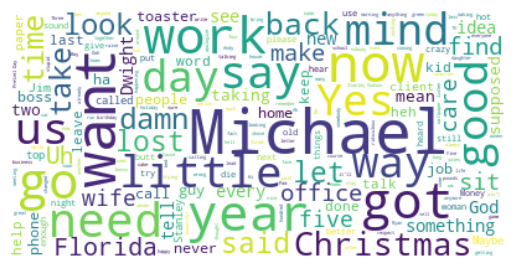

In [49]:
# Combine all rows of the column into a single string
text = ' '.join(theofficedf[theofficedf['character']=='Stanley']['line'])

# Create stopword list
stopwords = set(STOPWORDS)
stopwords.update(["Ok", "Okay", "Oh", "Yeah", "Well", "really", "know", "Hey", "going", "right", "think", "gonna", "one", "thing", "will", "thank"])  
# Generate a word cloud image

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, background_color="white").generate(text)
#wordcloud.to_file("stanleywc.png")
# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

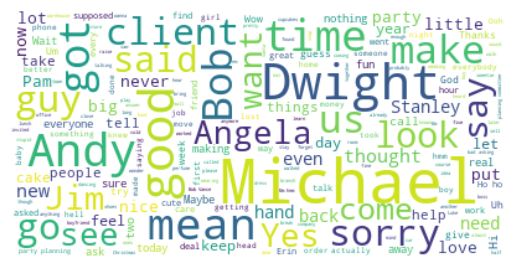

In [50]:
# Combine all rows of the column into a single string
text = ' '.join(theofficedf[theofficedf['character']=='Phyllis']['line'])

# Create stopword list
stopwords = set(STOPWORDS)
stopwords.update(["Ok", "Okay", "Oh", "Yeah", "Well", "really", "know", "Hey", "going", "right", "think", "gonna", "one", "thing", "will", "thank"])  
# Generate a word cloud image

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, background_color="white").generate(text)
#wordcloud.to_file("phylliswc.png")
# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [51]:
# Sentiment analysis
sia = SentimentIntensityAnalyzer()
theofficedf['sentiment'] = theofficedf['line'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [52]:
theofficedf.to_csv('theoffice.csv')

/var/folders/j7/vstms8g97ms_34xlkps7kx8c0000gn/T/ipykernel_1872/2107807109.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='sentiment', data=season_sentiment, palette='coolwarm')


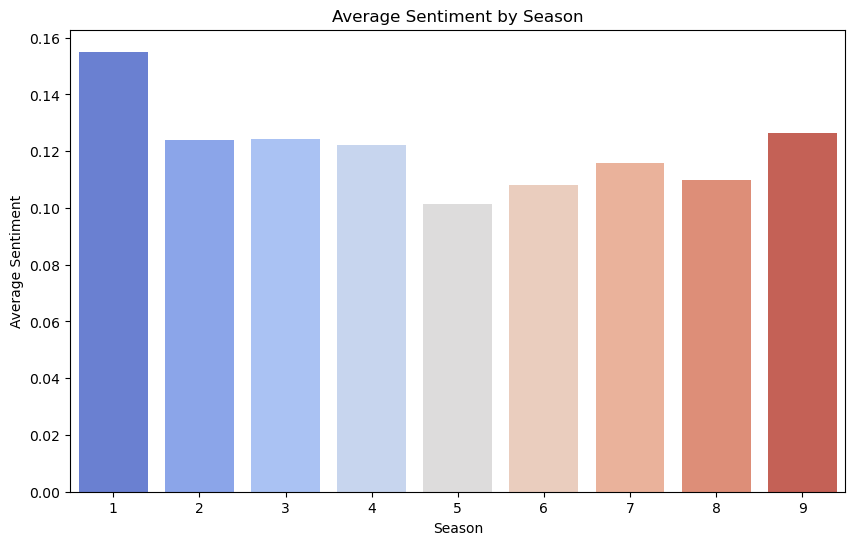

In [53]:
# Average sentiment per season
season_sentiment = theofficedf.groupby('season')['sentiment'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='sentiment', data=season_sentiment, palette='coolwarm')
plt.title("Average Sentiment by Season")
plt.xlabel("Season")
plt.ylabel("Average Sentiment")
plt.show()


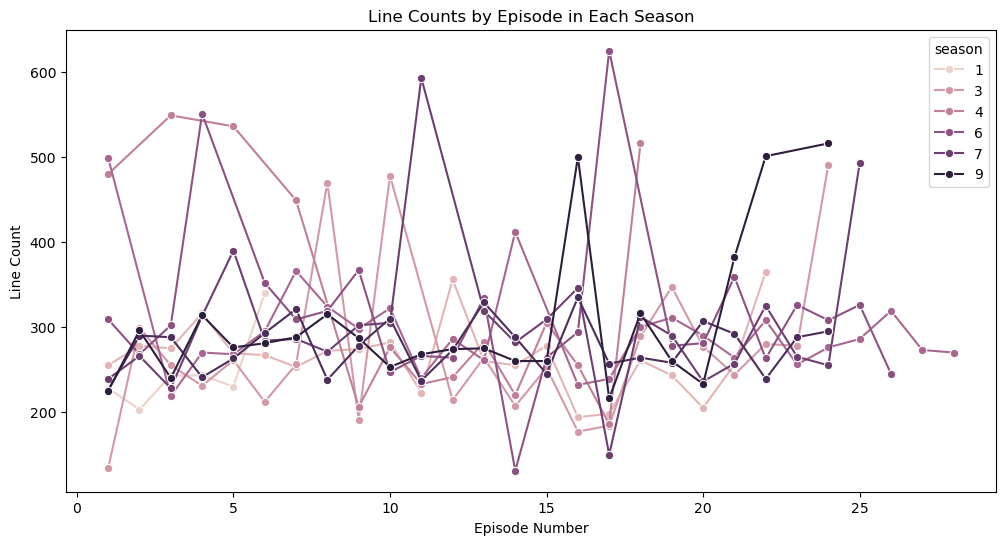

In [54]:
# Line counts per season and episode
season_episode_counts = theofficedf.groupby(['season', 'episode']).size().reset_index(name='line_Count')

plt.figure(figsize=(12, 6))
sns.lineplot(x='episode', y='line_Count', hue='season', data=season_episode_counts, marker="o")
plt.title("Line Counts by Episode in Each Season")
plt.xlabel("Episode Number")
plt.ylabel("Line Count")
plt.show()

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# TF-IDF vectorization
vectorizer = TfidfVectorizer(  stop_words='english')
tfidf_matrix = vectorizer.fit_transform(theofficedf['line'].dropna())

# Display top TF-IDF words
tfidf_features = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.sum(axis=0).A1
top_tfidf = sorted(zip(tfidf_scores, tfidf_features), reverse=True)

print("Top 10 TF-IDF Features:")
for score, word in top_tfidf[:50]:
    print(f"{word}: {score}")



Top 10 TF-IDF Features:
oh: 1402.7172644791467
yeah: 1391.5113406724163
okay: 1101.1431640586618
don: 1004.3973143600074
know: 994.1569995058636
just: 934.0803937167357
hey: 916.5667226952377
right: 829.5998375575089
yes: 801.0405451473031
michael: 754.5517551713975
good: 686.593905002348
like: 659.7886809736284
really: 625.1612094022942
ok: 611.0603276302757
think: 593.453833256639
did: 543.8466593344734
going: 532.944151114823
thank: 528.066273482801
dwight: 504.42155557366505
want: 481.4976954968133
uh: 470.583685850861
come: 465.73716272715365
ll: 464.58016883128795
let: 455.48694601066677
jim: 403.3331585294318
gonna: 402.78316154722233
got: 390.2229461106592
great: 379.4413834526049
pam: 373.79760121191094
god: 353.5481743455383
sorry: 351.2844373880486
say: 330.9144429394156
doing: 318.7428737017833
time: 317.185159890326
guys: 310.4697959296192
um: 308.17542256429533
need: 303.9225790536703
look: 287.30291518789426
andy: 279.0633215925686
alright: 278.9697767420043
sure: 278.50

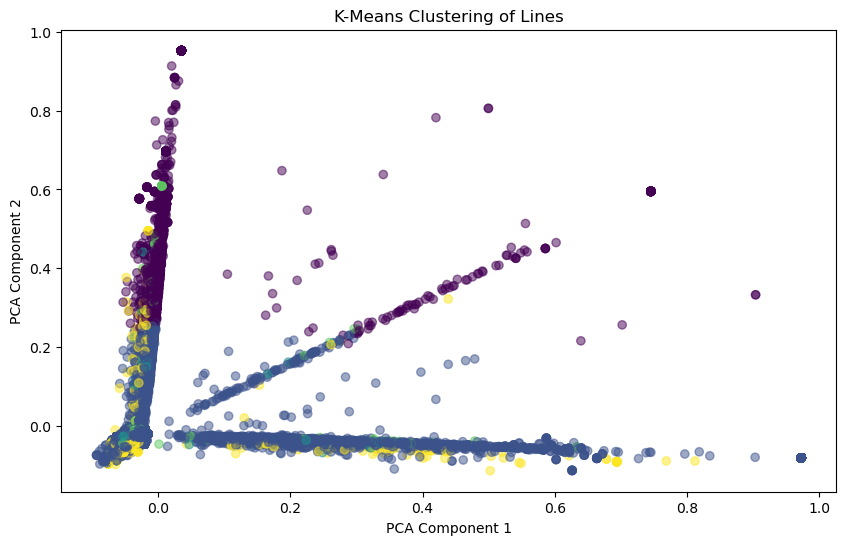

In [56]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(theofficedf['line'].dropna())

# Apply k-means clustering
kmeans = KMeans(n_clusters=5, init='random',  n_init=6, max_iter=10, tol=0.04, verbose=0, random_state=100, copy_x=False, algorithm='elkan')
theofficedf['cluster'] = kmeans.fit_predict(X)

# Visualize clusters using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=theofficedf['cluster'], cmap='viridis', alpha=0.5)
plt.title("K-Means Clustering of Lines")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()